<a href="https://colab.research.google.com/github/tirals88/predicting_pm2.5/blob/main/July/AIFacotry_gru_model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data load

model -1, 2 : 261 column data

model -3 : 167 column data ( 위/경도 삭제 )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 확인
import os
data = '/content/drive/MyDrive/AIFactory/dataset'
file_type = ['/TRAIN', '/TRAIN_AWS', '/TEST_INPUT', '/TEST_AWS']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv(data+'/input_full2_withdate.csv', index_col = 0) # index_col 없을 때 'Unnamed col : 0' 생김
train_data.interpolate(limit_direction='both')

,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),Latitude,Longitude,기온(°C).1,풍향(deg).1,풍속(m/s).1,...,Longitude.43,PM2.5.14,Latitude.44,Longitude.44,PM2.5.15,Latitude.45,Longitude.45,PM2.5.16,Latitude.46,Longitude.46
0,0.173776,0.201944,0.023018,0.0,0.828,36.4828,127.1365,0.154818,0.410833,0.033248,...,126.589735,0.024,36.780158,126.455197,0.032,36.677398,126.848918,0.096,36.199217,127.087021
1,0.176935,0.168611,0.030691,0.0,0.831,36.4828,127.1365,0.142180,0.148611,0.030691,...,126.589735,0.052,36.780158,126.455197,0.032,36.677398,126.848918,0.088,36.199217,127.087021
2,0.180095,0.087222,0.033248,0.0,0.784,36.4828,127.1365,0.173776,0.203889,0.040921,...,126.589735,0.040,36.780158,126.455197,0.048,36.677398,126.848918,0.072,36.199217,127.087021
3,0.178515,0.087222,0.025575,0.0,0.745,36.4828,127.1365,0.169036,0.330556,0.048593,...,126.589735,0.044,36.780158,126.455197,0.044,36.677398,126.848918,0.084,36.199217,127.087021
4,0.164297,0.113889,0.020460,0.0,0.750,36.4828,127.1365,0.169036,0.000000,0.007673,...,126.589735,0.028,36.780158,126.455197,0.036,36.677398,126.848918,0.096,36.199217,127.087021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.287520,0.765833,0.071611,0.0,0.577,36.4828,127.1365,0.265403,0.101944,0.025575,...,126.589735,0.040,36.780158,126.455197,0.036,36.677398,126.848918,0.012,36.199217,127.087021
35060,0.281201,0.753056,0.063939,0.0,0.586,36.4828,127.1365,0.252765,0.338056,0.015345,...,126.589735,0.032,36.780158,126.455197,0.036,36.677398,126.848918,0.012,36.199217,127.087021
35061,0.260664,0.000000,0.010230,0.0,0.674,36.4828,127.1365,0.257504,0.970556,0.040921,...,126.589735,0.044,36.780158,126.455197,0.040,36.677398,126.848918,0.028,36.199217,127.087021
35062,0.262243,0.011944,0.020460,0.0,0.660,36.4828,127.1365,0.262243,0.908056,0.030691,...,126.589735,0.040,36.780158,126.455197,0.052,36.677398,126.848918,0.024,36.199217,127.087021


In [ ]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 2.12.0
pandas: 1.5.3
numpy: 1.22.4
sklearn: 1.2.2
plotly: 5.13.1


In [ ]:
pm_list = ['PM2.5']
for i in range(16):
  #print('PM2.5.{}'.format(i+1))
  pm_list.append('PM2.5.{}'.format(i+1))

print(pm_list)

['PM2.5', 'PM2.5.1', 'PM2.5.2', 'PM2.5.3', 'PM2.5.4', 'PM2.5.5', 'PM2.5.6', 'PM2.5.7', 'PM2.5.8', 'PM2.5.9', 'PM2.5.10', 'PM2.5.11', 'PM2.5.12', 'PM2.5.13', 'PM2.5.14', 'PM2.5.15', 'PM2.5.16']


In [ ]:
for i in pm_list:
  column_to_move = i  # 이동시킬 열의 이름
  train_data[column_to_move] = train_data.pop(column_to_move)  # 열을 골라내서 맨 뒤로 이동

In [ ]:
train_data.interpolate(limit_direction='both')

,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),Latitude,Longitude,기온(°C).1,풍향(deg).1,풍속(m/s).1,...,PM2.5.7,PM2.5.8,PM2.5.9,PM2.5.10,PM2.5.11,PM2.5.12,PM2.5.13,PM2.5.14,PM2.5.15,PM2.5.16
0,0.173776,0.201944,0.023018,0.0,0.828,36.4828,127.1365,0.154818,0.410833,0.033248,...,0.044,0.036,0.044,0.052,0.044,0.072,0.0680,0.024,0.032,0.096
1,0.176935,0.168611,0.030691,0.0,0.831,36.4828,127.1365,0.142180,0.148611,0.030691,...,0.032,0.040,0.040,0.072,0.048,0.076,0.0680,0.052,0.032,0.088
2,0.180095,0.087222,0.033248,0.0,0.784,36.4828,127.1365,0.173776,0.203889,0.040921,...,0.036,0.032,0.048,0.068,0.060,0.080,0.0680,0.040,0.048,0.072
3,0.178515,0.087222,0.025575,0.0,0.745,36.4828,127.1365,0.169036,0.330556,0.048593,...,0.028,0.040,0.056,0.064,0.064,0.076,0.0680,0.044,0.044,0.084
4,0.164297,0.113889,0.020460,0.0,0.750,36.4828,127.1365,0.169036,0.000000,0.007673,...,0.028,0.040,0.048,0.064,0.064,0.096,0.0624,0.028,0.036,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.287520,0.765833,0.071611,0.0,0.577,36.4828,127.1365,0.265403,0.101944,0.025575,...,0.008,0.036,0.052,0.032,0.028,0.060,0.0520,0.040,0.036,0.012
35060,0.281201,0.753056,0.063939,0.0,0.586,36.4828,127.1365,0.252765,0.338056,0.015345,...,0.020,0.060,0.064,0.048,0.024,0.052,0.0480,0.032,0.036,0.012
35061,0.260664,0.000000,0.010230,0.0,0.674,36.4828,127.1365,0.257504,0.970556,0.040921,...,0.020,0.048,0.064,0.020,0.028,0.044,0.0360,0.044,0.040,0.028
35062,0.262243,0.011944,0.020460,0.0,0.660,36.4828,127.1365,0.262243,0.908056,0.030691,...,0.032,0.040,0.068,0.056,0.048,0.052,0.0480,0.040,0.052,0.024


In [ ]:
lat_list = ['Latitude', 'Longitude']
for i in range(46):
  #print('PM2.5.{}'.format(i+1))
  lat_list.append('Latitude.{}'.format(i+1))
  lat_list.append('Longitude.{}'.format(i+1))

print(lat_list)

['Latitude', 'Longitude', 'Latitude.1', 'Longitude.1', 'Latitude.2', 'Longitude.2', 'Latitude.3', 'Longitude.3', 'Latitude.4', 'Longitude.4', 'Latitude.5', 'Longitude.5', 'Latitude.6', 'Longitude.6', 'Latitude.7', 'Longitude.7', 'Latitude.8', 'Longitude.8', 'Latitude.9', 'Longitude.9', 'Latitude.10', 'Longitude.10', 'Latitude.11', 'Longitude.11', 'Latitude.12', 'Longitude.12', 'Latitude.13', 'Longitude.13', 'Latitude.14', 'Longitude.14', 'Latitude.15', 'Longitude.15', 'Latitude.16', 'Longitude.16', 'Latitude.17', 'Longitude.17', 'Latitude.18', 'Longitude.18', 'Latitude.19', 'Longitude.19', 'Latitude.20', 'Longitude.20', 'Latitude.21', 'Longitude.21', 'Latitude.22', 'Longitude.22', 'Latitude.23', 'Longitude.23', 'Latitude.24', 'Longitude.24', 'Latitude.25', 'Longitude.25', 'Latitude.26', 'Longitude.26', 'Latitude.27', 'Longitude.27', 'Latitude.28', 'Longitude.28', 'Latitude.29', 'Longitude.29', 'Latitude.30', 'Longitude.30', 'Latitude.31', 'Longitude.31', 'Latitude.32', 'Longitude.32', 

In [ ]:
train_data2 = train_data.copy()

In [ ]:
train_data2.shape

(35064, 261)

In [ ]:
for i in range(47):
  lat = lat_list[2*i]
  longi = lat_list[2*i + 1]
  del train_data2[lat]
  del train_data2[longi]

In [ ]:
train_data2.shape

(35064, 167)

## data set split

In [ ]:
#model -1, 2 : 261개 column
#model -3 : 167개 column
def split_train_val(train_data, time_steps, for_periods):
  """
  input:
    data: 날짜를 인덱스로 가지는 AWS 데이터와 PM2.5 데이터
  ouput:
    X_train, Y_train: 0년 1월 1일 00시 ~ 03년 07월 02일 08시 (30681 개의 데이터)
    X_test : 03년 07월 02일 09시부터의 데이터 (4383개의 데이터)
    7:1 비율
  time_steps: # input data time steps : 2days/48hours
  for_periods: # output data time steps : 3days/72hours
  """
  # training & validation set
  ## 결측치가 남아있는 경우가 있어서 다시 한 번 보간법 적용
  temp_train_AWS = train_data2[:30682].iloc[:, :-17].interpolate(limit_direction='both').values
  temp_train_PM = train_data2[:30682].iloc[:, -17:].interpolate(limit_direction='both').values

  temp_val_AWS = train_data2[30682:].iloc[:, :-17].interpolate(limit_direction='both').values
  temp_val_PM = train_data2[30682:].iloc[:, -17:].interpolate(limit_direction='both').values

  temp_train_len = len(temp_train_AWS)
  temp_val_len = len(temp_val_AWS)

  temp_train = np.concatenate((temp_train_AWS, temp_train_PM), axis = 1)

  #scale the data
  #from sklearn.preprocessing import MinMaxScaler
  #sc = MinMaxScaler(feature_range=(0,1))
  #temp_train_scaled = sc.fit_transform(temp_train)

  # training data slicing
  X_train = []
  Y_train = []
  Y_train_stacked = []
  for i in range(time_steps, temp_train_len - (for_periods - 1)):
    #temp_train2 = np.concatenate((temp_train_AWS[i-time_steps: i, :], temp_train_PM[i-time_steps: i, :]),axis=1)
    X_train.append(temp_train[i-time_steps: i, :])
    Y_train.append(temp_train[i:i+for_periods, -17:])
  X_train, Y_train = np.array(X_train), np.array(Y_train)

  #3차원으로 재구성
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 167))

  #여기까지 함 ~0705
  # 0706~
  #Preparing to creat X_val
  #함수 처음 부분에서 numpy array 로 변동해서 pandas가 아닌 numpy로 concatenate
  inputs_train = np.concatenate((temp_train_AWS, temp_train_PM), axis = 1)
  inputs_val = np.concatenate((temp_val_AWS, temp_val_PM), axis = 1)
  inputs = np.concatenate((inputs_train, inputs_val), axis=0)
  inputs = inputs[len(inputs)- temp_val_len - time_steps : ]
  #inputs = inputs.reshape(-1,1)

  X_val = []
  Y_val = []
  for i in range(time_steps, temp_val_len+time_steps-for_periods):
    X_val.append(inputs[i - time_steps:i, :])
    Y_val.append(temp_train[i:i+for_periods, -17:])
  X_val, Y_val = np.array(X_val), np.array(Y_val)
  X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 167))

  return X_train, Y_train, X_val, Y_val

In [ ]:
X_train, Y_train, X_val, Y_val = split_train_val(train_data2, 48, 72)

In [ ]:
#GRU - 3
def GRU_model_3(X_train, Y_train, X_val):
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, Permute
    from keras.optimizers import SGD

    # The GRU architecture
    my_GRU_model = Sequential()
    #my_GRU_model.add(keras.layers.Flatten())
    my_GRU_model.add(GRU(units = 48,
                         return_sequences = True,
                         input_shape = ((48, 167)),
                         activation = 'tanh'))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(GRU(units = 72,
                         return_sequences = True,
                         activation = 'tanh'))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(Permute((2, 1), input_shape=(48, 72)))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(Dense(units = 17))
    print(my_GRU_model.output_shape)

    # Compiling the RNN
    my_GRU_model.compile(optimizer = SGD(lr = 0.005, decay = 1e-6,
                                         momentum = 0.93, nesterov = True),
                         loss = 'mean_squared_error')

    # Fitting to the trainig set
    my_GRU_model.fit(X_train, Y_train, epochs = 20, batch_size = 2351, verbose = 1)

    GRU_prediction = my_GRU_model.predict(X_val)
    #GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

# (batch_size, time_seq, features)

In [ ]:
my_GRU_model3, GRU_prediction3 = GRU_model_3(X_train, Y_train, X_val)

(None, 48, 48)
(None, 48, 72)
(None, 72, 48)
(None, 72, 17)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
13/13 [==============================] - 8s 75ms/step - loss: 0.0517
Epoch 2/20
13/13 [==============================] - 1s 69ms/step - loss: 0.0313
Epoch 3/20
13/13 [==============================] - 1s 67ms/step - loss: 0.0211
Epoch 4/20
13/13 [==============================] - 1s 68ms/step - loss: 0.0168
Epoch 5/20
13/13 [==============================] - 1s 69ms/step - loss: 0.0144
Epoch 6/20
13/13 [==============================] - 1s 69ms/step - loss: 0.0128
Epoch 7/20
13/13 [==============================] - 1s 68ms/step - loss: 0.0118
Epoch 8/20
13/13 [==============================] - 1s 68ms/step - loss: 0.0110
Epoch 9/20
13/13 [==============================] - 1s 69ms/step - loss: 0.0104
Epoch 10/20
13/13 [==============================] - 1s 71ms/step - loss: 0.0099
Epoch 11/20
13/13 [==============================] - 1s 99ms/step - loss: 0.0095
Epoch 12/20
13/13 [==============================] - 1s 92ms/step - loss: 0.0092
Epoch 13/20
13/13 [==================

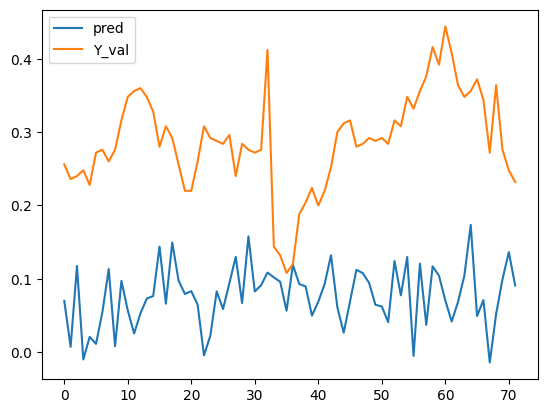

In [ ]:
plt.plot(np.arange(72), GRU_prediction3[0, :, 0], label='pred')
plt.plot(np.arange(72), Y_val[0, :, 0], label='Y_val')
plt.legend()

### model -1, 2
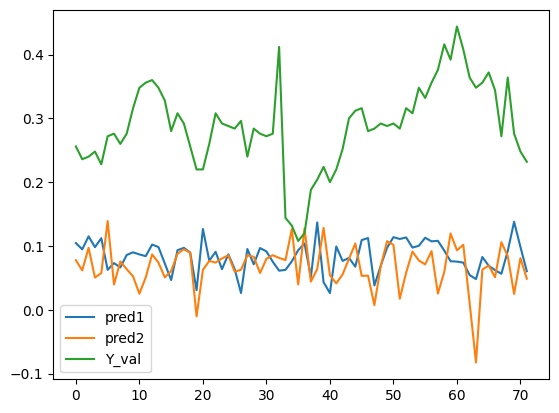

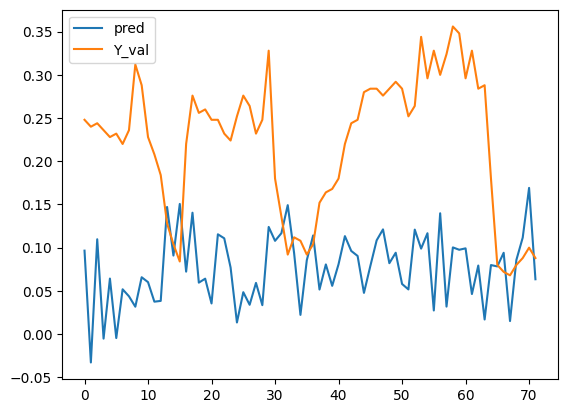

In [ ]:
plt.plot(np.arange(72), GRU_prediction3[0, :, 1], label='pred')
plt.plot(np.arange(72), Y_val[0, :, 1], label='Y_val')
plt.legend()

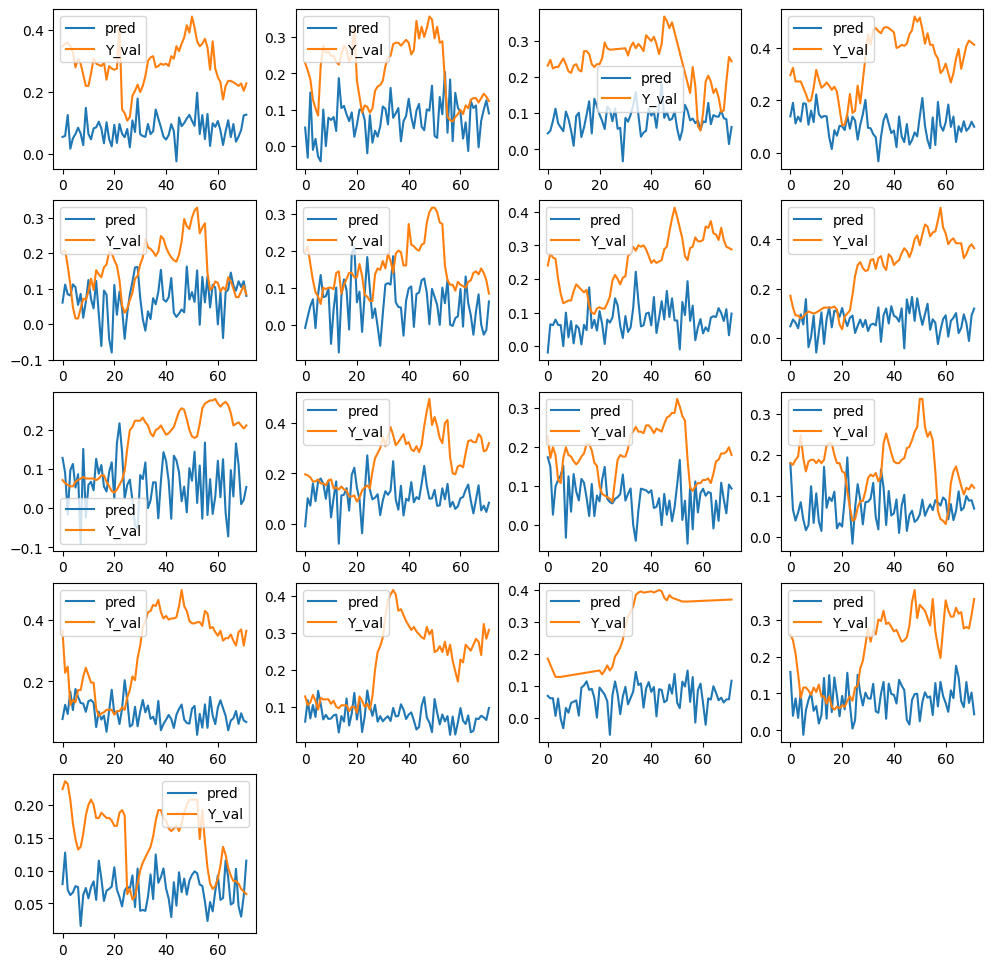

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(17):
  plt.subplot(5, 4, i+1)
  plt.plot(np.arange(72), GRU_prediction3[10, :, i], label='pred')
  plt.plot(np.arange(72), Y_val[10, :, i], label='Y_val')
  plt.legend()